In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

### Example 01

An ideal pendulum's behaviour can be modeled by the second order differential equation given by
$$\dfrac{d^2\theta}{dt^2}=\dfrac{-g\sin\theta}{l}$$.
<br>
For computational purposes it will be helpful to interpret the above equation as a system of two first order differential equations, namely
$$\dfrac{d\theta}{dt}=v(t); \dfrac{dv}{dt}=\dfrac{-g\sin\theta}{l}$$

In [2]:
class Pendulum:
    def __init__(self,df,m,l,ref,ad,v):
        self.damping_factor = df
        self.mass = m
        self.length = l
        self.run_experiment_for = ref
        self.angular_displacement = ad
        self.velocity = v
    def solution(self):
        t = np.linspace(0,self.run_experiment_for,500)
        X0 = [self.angular_displacement,self.velocity]
        def model(X,t):
            return([X[1],((-9.81*np.sin(X[0]))/self.length)-(self.damping_factor*X[1]/self.mass)])
        
        return(integrate.odeint(model,X0,t))
    def plot(self):
        t = np.linspace(0,self.run_experiment_for,500)
        X0 = [self.angular_displacement,self.velocity]
        theta = [Pendulum.solution(self)[i][0] for i in range(len(Pendulum.solution(self)))]
        v = [Pendulum.solution(self)[i][1] for i in range(len(Pendulum.solution(self)))]
        
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(6*2,6))
        
        ax1.set_aspect('auto')
        ax1.plot(t,theta,label='Angular Displacement')
        ax1.plot(t,v,label='Velocity')
        ax1.legend()
        ax1.set_title('Angular Displacement, Velocity v/s Time')

        ax2.set_aspect('auto')
        ax2.plot(v,theta)
        ax2.scatter(X0[1],X0[0],s=50,marker='x',c='Red',label='Initial Condition')
        ax2.legend()
        ax2.set_title('Phase Plane')
    def phase(self):
        t = np.linspace(0,self.run_experiment_for,500)
        X0 = [self.angular_displacement,self.velocity]
        theta = [Pendulum.solution(self)[i][0] for i in range(len(Pendulum.solution(self)))]
        v = [Pendulum.solution(self)[i][1] for i in range(len(Pendulum.solution(self)))]
        
        fig,ax2 = plt.figure(), plt.axes()
        ax2.set_aspect('auto')
        ax2.plot(v,theta)
        ax2.scatter(X0[1],X0[0],s=50,marker='x',c='Red',label='Initial Condition')
        ax2.legend()
        ax2.set_title('Phase Plane')

In [3]:
P = Pendulum(0.5,1,1,30,0,3)

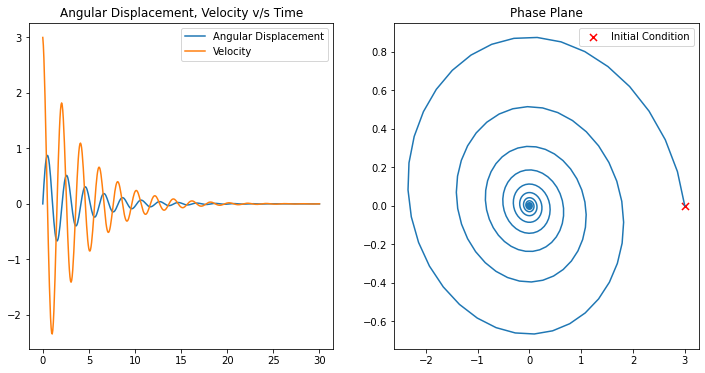

In [4]:
P.plot()

### Example 02

Consider a zombie apocalypse modeled by the following coupled system of first order differential equations.

$$h'(t) = \alpha h(t) - \beta h(t)z(t)$$
$$z'(t) = \gamma h(t)z(t) - \delta z(t)$$

In [5]:
a = 1
b = 0.1
c = 0.1
d = 1.5
def model(X,t):
    return(a*X[0] - b*X[0]*X[1], c*X[0]*X[1] - d*X[1])

In [6]:
X0 = [5,10]
t = np.linspace(0,20,1000)

In [7]:
S = integrate.odeint(model,X0,t)

In [8]:
h = [S[i][0] for i in range(len(S))]
z = [S[i][1] for i in range(len(S))]

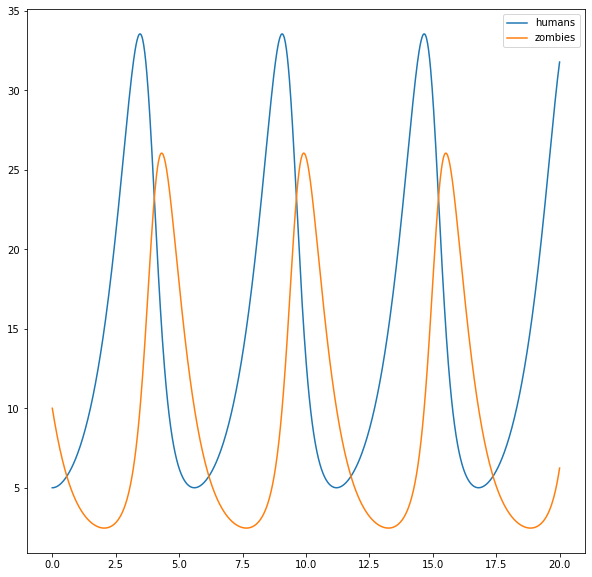

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(t,h,label='humans')
ax.plot(t,z,label='zombies')
ax.legend()
plt.show()

In [10]:
x = np.linspace(1,80,100)
y = np.linspace(1,80,100)

X,Y = np.meshgrid(x,y)
U,V = model([X,Y],t)
M = np.hypot(U,V)

In [11]:
U = U/M
V = V/M

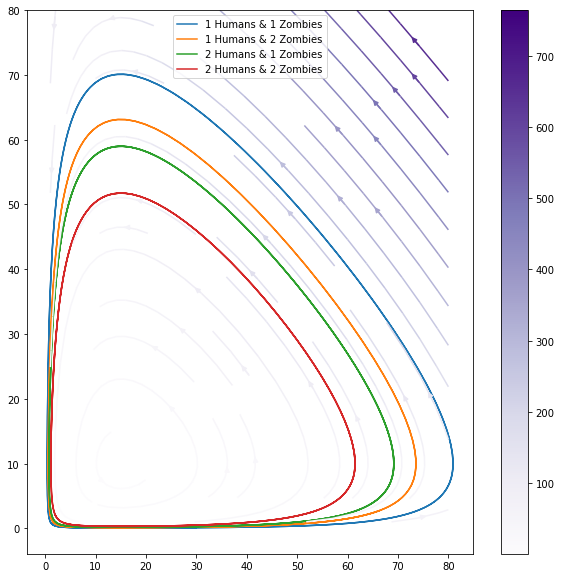

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
for i in range(1,3):
    for j in range(1,3):
        X0 = [i,j]
        S = integrate.odeint(model,X0,t)
        h = [S[i][0] for i in range(len(S))]
        z = [S[i][1] for i in range(len(S))]
        ax.plot(h,z,label=str(i)+' Humans & '+str(j)+' Zombies')
        ax.legend()
g=ax.streamplot(X, Y, U, V,density=0.5, cmap='Purples',color=M)
fig.colorbar(g.lines)